# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies
import json
import random
import requests
import numpy as np
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
from scipy.stats import linregress
from api_keys import weather_api_key


## Generate Cities List

In [4]:
latitude_data = np.random.randint(low=-90, high=90, size=1600)
longitude_data = np.random.randint(low=-180, high=180, size=1600)

coordinates = list(zip(latitude_data, longitude_data))

cities = []
for coordinate in coordinates:
    lat, lon = coordinate
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list:
    if city not in cities:
        cities.append(city)

print(len(cities))

643


In [5]:
# Set url for API
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

query_url=f'{url}appid={weather_api_key}&units={units}&q='

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Set empty lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

count=1

print('Beginning Data Retrieval')     
print('-----------------------------')

for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:
            city_name.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])  
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])  
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])   
            country.append(response['sys']['country'])
            date.append(response['dt'])     
    
        except KeyError:
            
            print(city + ' City not found. Skipping...') 
            
        count=count+1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 643 | santa maria
Processing Record 2 of 643 | cape town
Processing Record 3 of 643 | bluff
Processing Record 4 of 643 | dunedin
Processing Record 5 of 643 | paita
Processing Record 6 of 643 | klaksvik
Processing Record 7 of 643 | yellowknife
Processing Record 8 of 643 | punta arenas
Processing Record 9 of 643 | puerto ayora
Processing Record 10 of 643 | port alfred
Processing Record 11 of 643 | mar del plata
Processing Record 12 of 643 | barrow
Processing Record 13 of 643 | mataura
Processing Record 14 of 643 | mount gambier
Processing Record 15 of 643 | albany
Processing Record 16 of 643 | carnarvon
Processing Record 17 of 643 | beringovskiy
Processing Record 18 of 643 | port elizabeth
Processing Record 19 of 643 | sentyabrskiy
sentyabrskiy City not found. Skipping...
Processing Record 20 of 643 | dikson
Processing Record 21 of 643 | marawi
Processing Record 22 of 643 | punta gorda
Processing Record 23 of 6

Processing Record 195 of 643 | namibe
Processing Record 196 of 643 | liberal
Processing Record 197 of 643 | barbate
Processing Record 198 of 643 | taltal
Processing Record 199 of 643 | pochutla
Processing Record 200 of 643 | sitka
Processing Record 201 of 643 | bataipora
Processing Record 202 of 643 | antsohihy
Processing Record 203 of 643 | charters towers
Processing Record 204 of 643 | broken hill
Processing Record 205 of 643 | rungata
rungata City not found. Skipping...
Processing Record 206 of 643 | port hardy
Processing Record 207 of 643 | hovd
Processing Record 208 of 643 | bredasdorp
Processing Record 209 of 643 | xghajra
xghajra City not found. Skipping...
Processing Record 210 of 643 | hofn
Processing Record 211 of 643 | saraland
Processing Record 212 of 643 | malbork
Processing Record 213 of 643 | heihe
Processing Record 214 of 643 | lavrentiya
Processing Record 215 of 643 | buraydah
Processing Record 216 of 643 | susner
Processing Record 217 of 643 | goure
Processing Record 

Processing Record 385 of 643 | ureki
Processing Record 386 of 643 | alice springs
Processing Record 387 of 643 | pisco
Processing Record 388 of 643 | san cristobal
Processing Record 389 of 643 | piryion
piryion City not found. Skipping...
Processing Record 390 of 643 | derzhavinsk
Processing Record 391 of 643 | gardan diwal
gardan diwal City not found. Skipping...
Processing Record 392 of 643 | matay
Processing Record 393 of 643 | caravelas
Processing Record 394 of 643 | sesheke
Processing Record 395 of 643 | klyuchi
Processing Record 396 of 643 | ridgecrest
Processing Record 397 of 643 | muravlenko
Processing Record 398 of 643 | lorengau
Processing Record 399 of 643 | yomitan
yomitan City not found. Skipping...
Processing Record 400 of 643 | khani
Processing Record 401 of 643 | seoul
Processing Record 402 of 643 | borujan
borujan City not found. Skipping...
Processing Record 403 of 643 | attawapiskat
attawapiskat City not found. Skipping...
Processing Record 404 of 643 | warqla
warqla

Processing Record 572 of 643 | aswan
Processing Record 573 of 643 | dubai
Processing Record 574 of 643 | rawson
Processing Record 575 of 643 | kharp
Processing Record 576 of 643 | rocha
Processing Record 577 of 643 | ust-nera
Processing Record 578 of 643 | jacareacanga
Processing Record 579 of 643 | san jose
Processing Record 580 of 643 | vagur
Processing Record 581 of 643 | marzuq
Processing Record 582 of 643 | vestmannaeyjar
Processing Record 583 of 643 | meulaboh
Processing Record 584 of 643 | kopervik
Processing Record 585 of 643 | lingao
Processing Record 586 of 643 | hvammstangi
hvammstangi City not found. Skipping...
Processing Record 587 of 643 | yulara
Processing Record 588 of 643 | chauk
Processing Record 589 of 643 | santo antonio do sudoeste
Processing Record 590 of 643 | rovaniemi
Processing Record 591 of 643 | harrismith
Processing Record 592 of 643 | kaitong
Processing Record 593 of 643 | olafsvik
Processing Record 594 of 643 | millinocket
Processing Record 595 of 643 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Maria,-29.6842,-53.8069,75.20,46,0,8.05,BR,1619725450
1,Cape Town,-33.9258,18.4232,57.99,76,20,10.36,ZA,1619725012
2,Bluff,-46.6000,168.3333,51.01,93,88,8.99,NZ,1619725029
3,Dunedin,-45.8742,170.5036,53.01,84,100,5.01,NZ,1619725450
4,Paita,-5.0892,-81.1144,82.40,57,0,17.27,PE,1619725450
5,Klaksvík,62.2266,-6.5890,37.40,70,75,12.66,FO,1619725451
6,Yellowknife,62.4560,-114.3525,30.00,58,20,6.91,CA,1619725292
7,Punta Arenas,-53.1500,-70.9167,42.80,75,0,5.75,CL,1619725451
8,Puerto Ayora,-0.7393,-90.3518,84.20,70,40,20.71,EC,1619725451
9,Port Alfred,-33.5906,26.8910,64.18,79,100,11.99,ZA,1619725452


In [8]:
weather_data = weather_data.dropna(how='any')

In [9]:
weather_data.to_csv("Output/weather_data.csv", index=False, header=True)

In [10]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,5.880000e+02
mean,21.539127,18.555802,60.926769,71.697279,55.659864,7.569286,1.619725e+09
std,33.380715,90.309451,19.202874,21.799618,38.180865,4.778555,2.070847e+02
min,-54.800000,-175.200000,-1.620000,4.000000,0.000000,0.760000,1.619725e+09
25%,-6.396175,-62.270775,46.400000,61.000000,20.000000,3.890000,1.619725e+09
50%,27.014800,22.824050,64.400000,76.000000,70.000000,6.860000,1.619725e+09
75%,49.848350,100.340125,77.000000,88.000000,91.000000,10.360000,1.619726e+09
max,78.218600,179.316700,96.670000,100.000000,100.000000,32.210000,1.619726e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
humidity_100 = weather_data.loc[weather_data["Humidity"] > 100]
humidity_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [29]:
#  Get the indices of cities that have humidity over 100%.

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


Max Temp is equal to 100%, therefore there are no cities with a max temperature higher than 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

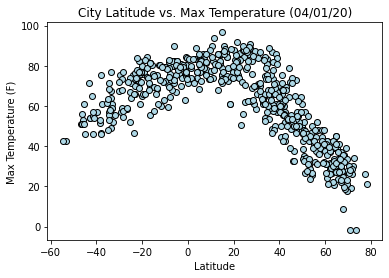

<Figure size 432x288 with 0 Axes>

In [13]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
plt.savefig('Output/City Latitude vs. Max Temp.png')

## Latitude vs. Humidity Plot

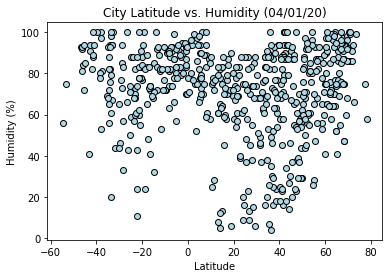

<Figure size 432x288 with 0 Axes>

In [14]:
# Create a Scatter Plot for Humidity vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
plt.savefig('Output/City Latitude vs. Humidity.png')

## Latitude vs. Cloudiness Plot

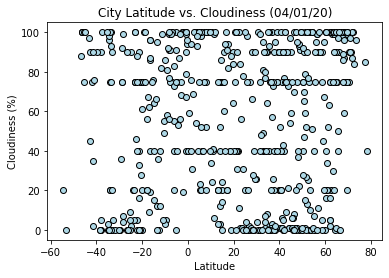

<Figure size 432x288 with 0 Axes>

In [15]:
# Create a Scatter Plot for Cloudiness vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
plt.savefig('Output/City Latitude vs. Cloudiness.png')

## Latitude vs. Wind Speed Plot

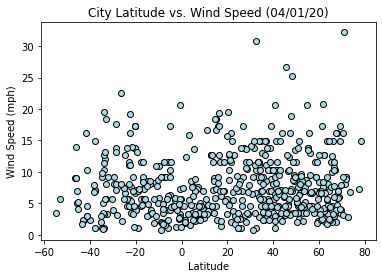

<Figure size 432x288 with 0 Axes>

In [16]:
# Create a Scatter Plot for Wind Speed vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig('Output/City Latitude vs. Wind Speed.png')

## Linear Regression

In [17]:
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
northern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,Klaksvík,62.2266,-6.5890,37.40,70,75,12.66,FO,1619725451
6,Yellowknife,62.4560,-114.3525,30.00,58,20,6.91,CA,1619725292
11,Barrow,71.2906,-156.7887,19.40,86,90,8.05,US,1619725452
14,Albany,42.6001,-73.9662,57.00,90,100,2.75,US,1619725453
16,Beringovskiy,63.0500,179.3167,26.56,74,99,3.49,RU,1619725120
...,...,...,...,...,...,...,...,...,...
581,Bathsheba,13.2167,-59.5167,80.60,61,20,12.66,BB,1619725068
582,Heishan,41.6892,122.1128,42.39,58,5,4.34,CN,1619725587
583,Nibbar,36.2941,8.7666,68.00,49,20,12.66,TN,1619725587
586,Zhezkazgan,47.8043,67.7144,54.93,53,95,18.84,KZ,1619725134


In [18]:
southern_hemisphere = weather_data.loc[weather_data["Lat"] <0]
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Maria,-29.6842,-53.8069,75.20,46,0,8.05,BR,1619725450
1,Cape Town,-33.9258,18.4232,57.99,76,20,10.36,ZA,1619725012
2,Bluff,-46.6000,168.3333,51.01,93,88,8.99,NZ,1619725029
3,Dunedin,-45.8742,170.5036,53.01,84,100,5.01,NZ,1619725450
4,Paita,-5.0892,-81.1144,82.40,57,0,17.27,PE,1619725450
...,...,...,...,...,...,...,...,...,...
572,Matata,-37.8833,176.7500,46.00,97,5,1.01,NZ,1619725584
573,Tevaitoa,-16.7833,-151.5000,81.50,74,96,8.32,PF,1619725585
574,Boende,-0.2167,20.8667,73.26,93,96,1.21,CD,1619725585
584,Warrnambool,-38.3833,142.4833,53.02,78,0,7.94,AU,1619725587


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7695350956422841


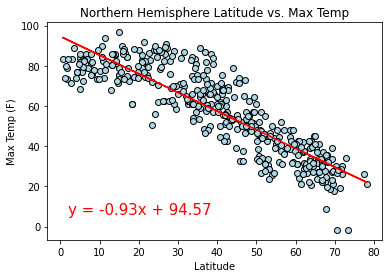

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,6),fontsize=15,color="red")

#titles
plt.title('Northern Hemisphere Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#show
plt.show()

plt.savefig('Output/Northern Latitude vs. Max Temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5191576286701257


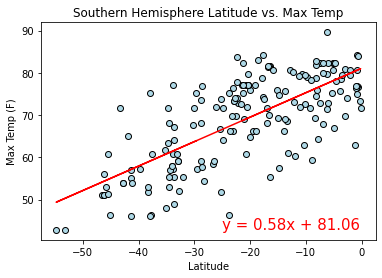

In [20]:
# Create a Scatter Plot for Wind Speed vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-25,43), fontsize=15, color="red")

#titles
plt.title('Southern Hemisphere Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#show
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.018481952977947087


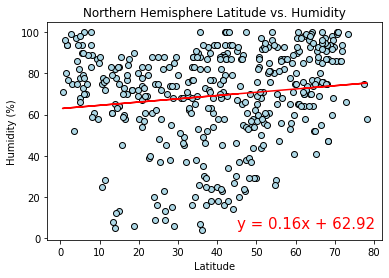

In [21]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45, 5),fontsize=15,color="red")

#titles
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#show
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.007198009752836336


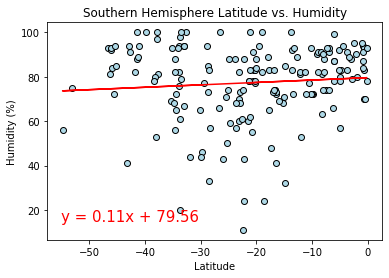

In [22]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

#titles
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#show
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.012113380002555107


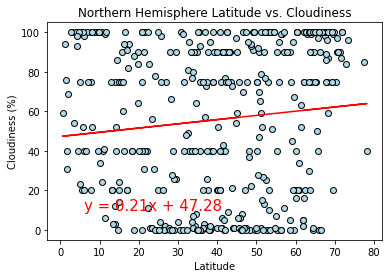

In [23]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#titles
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#show
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02954690465026552


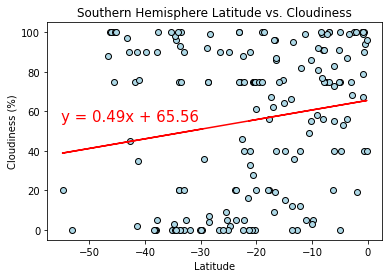

In [24]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")

#titles
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#show
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0012736770634089697


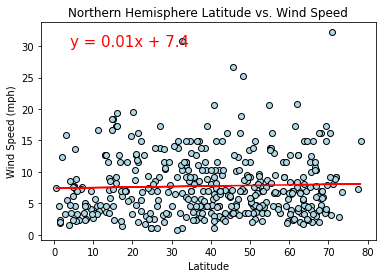

In [25]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,30),fontsize=15,color="red")

#titles
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#show
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.014412150113279591


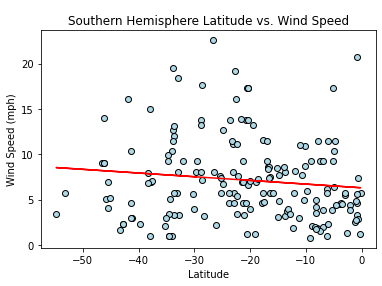

In [26]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

#titles
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r value
print(f"The r-value is: {rvalue**2}")

#show
plt.show()